# Introduction

In this series of excercises, you will learn how to work with ase databases, and do some simple machine learning for electronic structure properties. The driving idea is to predict complex properties of compounds from simpler properties, under the slogan that the fastest calculation is the one you don't have to run. We start by importing some relevant packages for scientific python and ase in particular.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ase.db import connect

In current directory, there is an ase database file called 'organometal.db'. It contains information about organometallic perovskites, and the goal is to predict properties for these. Along with the perovskite compounds, there are also reference calculations of the elements in their standard states. We start by connecting to the database (more info on the `ase db` module can be found [here]( https://wiki.fysik.dtu.dk/ase/ase/db/db.html#module-ase.db)), and inspecting a single row:

In [31]:
db = connect('organometal.db')
row = next(db.select(project='organometal'))
vars(row)

{'_constraints': [],
 '_constrained_forces': None,
 '_data': {},
 '_keys': ['gllbsc_disc',
  'project',
  'name',
  'symmetry',
  'gllbsc_ind_gap',
  'space_group',
  'gllbsc_dir_gap'],
 'gllbsc_disc': 0.774472126365,
 'project': 'organometal',
 'name': 'CsPbBr2Cl',
 'symmetry': 'cubic',
 'gllbsc_ind_gap': 1.70940736951,
 'space_group': 'Pm-3m',
 'gllbsc_dir_gap': 1.709407369515,
 'id': 1,
 'unique_id': 'c42d78a9c7545237cde6dda95acad33d',
 'ctime': 14.594562360668524,
 'mtime': 15.119345260915757,
 'user': 'ivca',
 'numbers': array([82, 35, 35, 17, 55], dtype=int32),
 'positions': array([[ 9.74372929e-03,  9.74372929e-03,  5.84992079e-04],
        [ 2.96220983e+00,  3.25742346e-04,  1.90601406e-05],
        [ 3.25742346e-04,  2.96220983e+00,  1.90601406e-05],
        [-5.37131470e-04, -5.37131470e-04,  2.80214440e+00],
        [ 2.97311285e+00,  2.97311285e+00,  2.80272605e+00]]),
 'cell': array([[5.9028631 , 0.        , 0.        ],
        [0.        , 5.9028631 , 0.        ],
      

Each row of the database has some key-value pairs, which are stored explicitly, as well as some basic information which is always stored, recording how the data was calculated. Can you identify what each of the keys below refers to?

calculator:
calculator_parameters:
cell:
ctime:
energy:
gllbsc_dir_gap:
gllbsc_disc:
gllbsc_ind_gap:
id:
initial_magmoms:
mtime:
name:
numbers:
pbc:
positions:
project:
space_group:
symmetry:
unique_id:
user:

Each row also has a `toatoms()` method, which lets us extract an ase atoms object from the row.

In [3]:
from ase.visualize import view
view(row.toatoms())

When doing any kind of data analysis, the first step is always to become familiar with the data in question, on a basic level. The `select()` method of the database applies a query to the database and returns an iterator of all the rows matching that query. To select all rows with a user of `einstein`, we would type `db.select(user='einstein')`. To select all rows with a gllbsc direct gap greater than 0.5 eV, we would type `db.select('gllbsc_dir_gap>0.5')`.
Counting the number of hits can be be done using `db.count(key=value)` for some key-value pair.

How many rows are there in the database? 
How many belong to the `organometal` project? And how many to the `references` subproject?

In [25]:
# teacher
print(db.count())
print(db.count(project='organometal'))
print(db.count(subproject='references'))

240
240
0


The structures in the database were generated from the general formula ABX, and then varying A, B and X. X represents a combination of 3 halogen atoms, chosen from ["Cl", "Br", "I"].
The A, B and X is encoded in value for the key `name`, i.e. `row.name -> 'CsPbI3'`.
We have also distorted some of the structures, giving four different symmetry types for each atomic composition.

1. Try to identity the possible values of A and B. (Hint: A and B is labeled with two characters `row.name`, i.e `A='Cs'` and `B='Pb'` in `'CsPbI3'`)
2. Can you identify the four different symmetry classes?
3. By making all possible combinations of both A, B, X, and symmetires, how many structures could be generated in total? And how many unique are there, i.e. without considering the different symmetries?

In [5]:
# teacher
# general formula ABX 
print('example of a name: {}'.format((next(db.select('project')).name)))
As = {r.name[:2] for r in db.select('project')}
Bs = {r.name[2:4] for r in db.select('project')}
symclasses = {r.symmetry for r in db.select('project')}
Xs = ['I3', 'Br3', 'Cl3', 'I2Br', 'IBr2', 'I2Cl', 'ICl2', 'IBrCl', 'Br2Cl', 'BrCl2']
print('{} As: {}'.format(len(As), As))
print('{} Bs: {}'.format(len(Bs), Bs))
print('{} Xs: {}'.format(len(Xs), Xs))
print('{} symclasses: {}'.format(len(symclasses), symclasses))
NA = len(As)
NB = len(Bs)
NS = len(symclasses)
NH = len(Xs)
print('possible structures:', NA * NB * NS * NH)
print('possible structures without symmetry:', NA * NB * NH)

example of a name: FASnCl3
3 As: {'MA', 'Cs', 'FA'}
2 Bs: {'Pb', 'Sn'}
10 Xs: ['I3', 'Br3', 'Cl3', 'I2Br', 'IBr2', 'I2Cl', 'ICl2', 'IBrCl', 'Br2Cl', 'BrCl2']
4 symclasses: {'orthorhombic_1', 'orthorhombic_2', 'tetragonal', 'cubic'}
possible structures: 240
possible structures without symmetry: 60


As you can see from the exercise above, two organic molecules (methylammonium MA, formula CH$_6$N and formamidinium FA, formula CH$_5$N$_2$) can be used instead of Cs as cations in the inorganic perovskite template. Print the structure of MA and FA from the reference subproject in the database.

In [6]:
# teacher
formulas = ['CH6N', 'CH5N2']
view([db.get(formula=f).toatoms() for f in formulas])

Two good ideas are to plot distributions of interesting quantities, and to calculate some summary statistics of numeric quantities, such as the mean and the variance.

CsPbBr2Cl 1.70940736951 1.709407369515 0.774472126365 1 0.13
CsPbBr3 1.63856458829 1.6385645882940003 0.761884933774 1 0.13
CsPbBrCl2 1.7974683961000002 1.7974683961020004 0.791636932942 1 0.13
CsPbCl3 2.2650727745 2.2650727745080004 0.902654652358 1 0.13
CsPbI2Br 1.4657547957600001 1.4657547957610002 0.749959997511 1 0.13
CsPbI2Cl 1.30600900079 1.3060090007860001 0.694402115746 1 0.13
CsPbI3 1.6244740319700002 1.6244740319700002 1.13065056747 1 0.13
CsPbIBr2 1.90862572273 2.077225399929 0.871431737659 1 0.13
CsPbIBrCl 1.88679777259 1.978307969601 0.855058516331 1 0.13
CsPbICl2 2.10304158161 2.206652320043 0.912159889193 1 0.13
CsSnBr2Cl 0.552170506516 0.552170506516 0.308301501182 0.25 0.13
CsSnBr3 0.515043196088 0.5150431960880001 0.300143474132 0.25 0.13
CsSnBrCl2 0.590173648989 0.5901736489889999 0.315897153552 0.25 0.13
CsSnCl3 0.9687528729600001 0.968752872963 0.358486631514 0.25 0.13
CsSnI2Br 0.35917768024999996 0.35917768025099994 0.3765507463 0.25 0.13
CsSnI2Cl 0.3657556669060

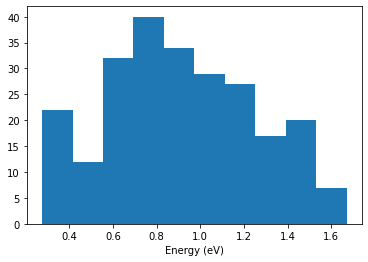

In [26]:
organometal_rows = [x for x in db.select(project='organometal')]
for row in organometal_rows:
    if 'Pb' in row.name:
        soc = 1
    if 'Sn' in row.name:
        soc = 0.25    
    print(row.name,row.gllbsc_ind_gap,row.gllbsc_dir_gap,row.gllbsc_disc,soc,"0.13")
plt.hist([x.gllbsc_disc for x in organometal_rows])
plt.xlabel('Energy (eV)');
plt.show()

Make a histogram for each of the numeric quantities in the database, and calculate the mean and variance of these quantities. You can also make scatter plots of one quantitity against another by using the `scatter` method of pyplot, `plt.scatter()`. How do these distributions vary with the `symmetry` keyword of the database?

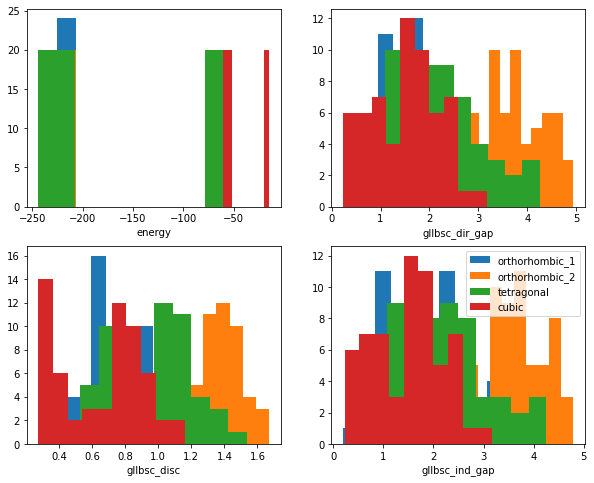

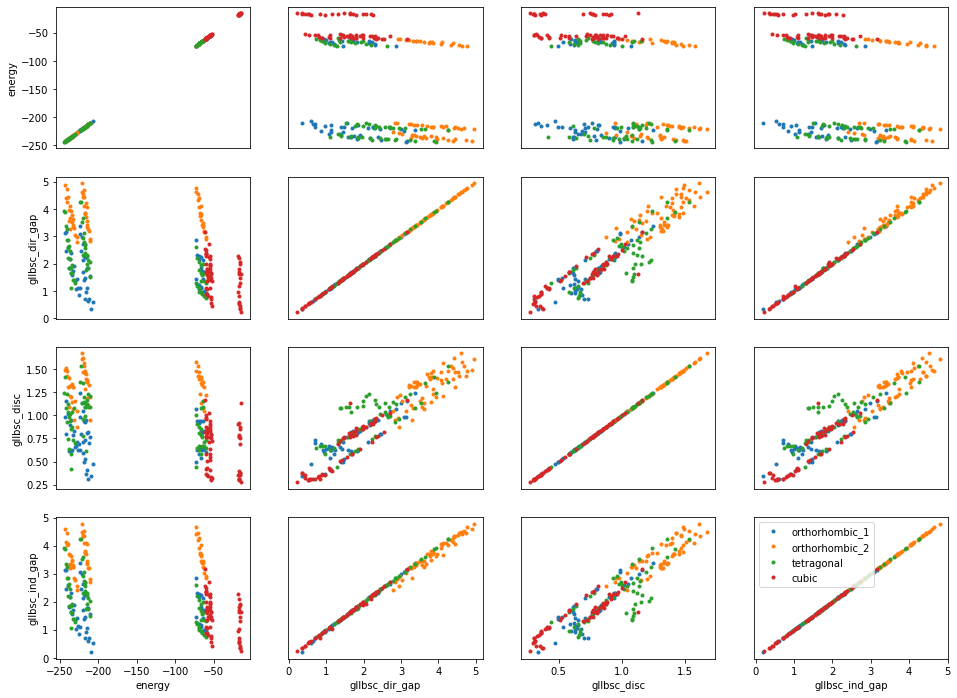

In [27]:
# teacher
attributeNames = ['energy','gllbsc_dir_gap','gllbsc_disc','gllbsc_ind_gap']
M = len(attributeNames)
N = db.count(project='organometal')
classes = [r.symmetry for r in db.select('project')]
y = np.array(classes)
x1  = [x.ctime for x in organometal_rows];x2 = [x.energy for x in organometal_rows];x3 = [x.gllbsc_dir_gap for x in organometal_rows];
x4 = [x.gllbsc_disc for x in organometal_rows];x5 = [x.gllbsc_ind_gap for x in organometal_rows]; x6 = [x.mtime for x in organometal_rows];
X = np.zeros((N,len(attributeNames)))
for i,x in enumerate([x2,x3,x4,x5]):
    X[:,i] = np.array(x)
# now plot that 
plt.figure(figsize=(10,8))
u = np.floor(np.sqrt(M)); v = np.ceil(float(M)/u)
for i in range(M):
    plt.subplot(u,v,i+1)
    for c in set(classes):
        class_mask = (y==c)
        plt.hist(X[class_mask,i])
    plt.xlabel(attributeNames[i])
plt.legend(list(set(classes)))


plt.figure(figsize=(16,12))
for m1 in range(M):
    for m2 in range(M):
        plt.subplot(M, M, m1*M + m2 + 1)
        for c in set(classes):
            class_mask = (y==c)
            plt.plot(np.array(X[class_mask,m2]), np.array(X[class_mask,m1]), '.')
            if m1==M-1:
                plt.xlabel(attributeNames[m2])
            else:
                plt.xticks([])
            if m2==0:
                plt.ylabel(attributeNames[m1])
            else:
                plt.yticks([])
plt.legend(list(set(classes)));

The energy contained in each row is an energy with respect to some arbitrary reference, which was set in the original calculation. A more sensible reference is provided by the materials with `subproject == 'references'`. We can calculate the heat for formation per unit cell of the 'MAPbI3' compound as follows:

In [10]:
db1 = connect('references.db')

row = db.get(name='MAPbI3', symmetry='cubic')
en_cubic = row.energy
en_refs = {}
for row in db1.select(subproject='references'):
    en_refs[row.element] = row.energy / row.natoms
    
E_standard = en_cubic - (8 * en_refs['MA'] + en_refs['Pb'] + 3 * en_refs['I'])
print('hof={:.3f} eV/atom'.format(E_standard / row.natoms))

hof=-0.668 eV/atom


Based on this, can you calculate the heat of formation per formula unit of MAPbI$_3$ in the tetragonal phase versus the cubic phase? What about the heat of formation of FASnBr$_2$Cl in the orthorhombic_1 phase versus the cubic phase of the FASnBr$_3$ and FASnCl$_3$. (hint: tetragonal and orthorhombic phases have a unit cell larger than the cubic structure).

In [ ]:
# teacher
row_c = db.get(name='MAPbI3', symmetry='cubic')
view(row_c.toatoms())
row_t = db.get(name='MAPbI3', symmetry='tetragonal') 
de = row_c.energy / row_c.natoms - row_t.energy / row_t.natoms
de_form = 12 * de  # 12 atoms per formula unit
print('E(cubic) - E(tetragonal)={:.4f} eV/Fu'.format(de_form))

Can you screen the database for possible materials that are stable, i.e. the most stable composition despite the symmetry, and with a bandgap in the visible range, i.e gllbsc_ind_gap between 1.5 and 3.0 eV? Hint: remember that there are four different symmetries for each composition. Only the most stable symmetry should be used.

In [36]:
# teacher
import re

materials = {}
for row in db.select():
    if row.name not in materials.keys():
        materials[row.name] = {}
    materials[row.name][row.symmetry] = {}
    materials[row.name][row.symmetry]['energy'] = row.energy/row.natoms
    materials[row.name][row.symmetry]['gap'] = row.gllbsc_ind_gap
    
for composition in materials.keys():
    gs = ''
    gs_en = 10000
    for symmetry in materials[composition].keys():
        if materials[composition][symmetry]['energy'] < gs_en:
            gs_en = materials[composition][symmetry]['energy'] 
            gs = symmetry
    if materials[composition][gs]['gap'] > 1.5 and materials[composition][gs]['gap'] < 3.0:
        print(composition,gs,materials[composition][gs]['gap'])

CsPbBrCl2 tetragonal 2.19075808719
CsPbCl3 orthorhombic_1 2.85538481061
CsPbI3 orthorhombic_2 2.9235026994999997
CsPbIBr2 tetragonal 1.5805354088099999
CsPbIBrCl tetragonal 1.66394916402
CsPbICl2 orthorhombic_1 2.1538896692500002
CsSnI2Cl tetragonal 1.6167531023700001
CsSnI3 orthorhombic_2 2.84328884574
MAPbBr2Cl cubic 2.17703760174
MAPbBr3 cubic 1.9638606150000002
MAPbBrCl2 cubic 2.2941646222000003
MAPbCl3 cubic 2.71236708244
MAPbI2Cl cubic 1.6243958681700001
MAPbIBr2 cubic 1.6457937251399999
MAPbIBrCl cubic 1.80542545575
MAPbICl2 cubic 1.99706902451
MASnBr2Cl orthorhombic_1 2.12888970149
MASnBrCl2 cubic 1.91366145778
MASnCl3 cubic 2.22647582524
MASnI3 orthorhombic_2 2.69879288473
MASnIBr2 tetragonal 1.7331345043600002
MASnICl2 orthorhombic_1 1.69325549102
FAPbBr2Cl cubic 2.33698597005
FAPbBr3 cubic 2.29018964607
FAPbBrCl2 cubic 2.50372574941
FAPbI2Br cubic 1.60172500535
FAPbI2Cl cubic 1.79060500377
FAPbIBr2 cubic 1.7129321929599999
FAPbIBrCl cubic 1.8047315850600003
FAPbICl2 cubic 1.